### Use case 1: regrid from the ICON native grid to regular lat/lon

#### Setup

Experimental environment set up:
```
pip install -i https://test.pypi.org/simple/ eckit==1.33.1.dev24
uv pip install --no-cache --prerelease allow --upgrade mir-python
pip install --pre -i https://test.pypi.org/simple/ mirlib==1.27.11.dev24
```

Earthkit branches:
```
earthkit-utils develop
earthkit-data develop
earthkit-plots feature/sources-redesign
earthkit-regrid develop
```

In [1]:
import earthkit.data as ekd
import os

os.environ['ECCODES_ECKIT_GEO'] = "1"


fname = "horizontal_constants_icon-ch1-eps.grib2"
ds = ekd.from_source("file",fname)

# List the fields, note `gridType` is now `unstructured``
ds.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,lssw,lsm,surface,0,20260210,1500,0m,cp,0,unstructured_grid
1,lssw,h,unknown,0,20260210,1500,0m,cp,0,unstructured_grid
2,lssw,unknown,surface,0,20260210,1500,0m,cp,0,unstructured_grid
3,lssw,tlon,surface,0,20260210,1500,0m,cp,0,unstructured_grid
4,lssw,tlat,surface,0,20260210,1500,0m,cp,0,unstructured_grid



`gridSpec` describes spatial grids in the form a dict

In [2]:
f = ds[1]
f.metadata("gridSpec")

'{"grid":"ICON-CH1"}'

Return the latitude and longitude of all the gridpoints

In [3]:
f.to_latlon()

{'lat': array([50.2413063 , 50.23910904, 50.23666763, ..., 50.05722427,
        50.04892349, 50.04404068], shape=(1147980,)),
 'lon': array([17.71068347, 17.68919909, 17.70238268, ..., 12.80589831,
        12.80931628, 12.80199206], shape=(1147980,))}

Plotting Geometrical height

/users/nburgdor/.cache/pypoetry/virtualenvs/nwp-demo-_81H7AQh-py3.11/lib/python3.11/site-packages/earthkit/plots/styles/__init__.py:525: UserWarning: The following kwargs were not used by contour: 'transform_first'
  return ax.tricontourf(x, y, values, *args, **kwargs)


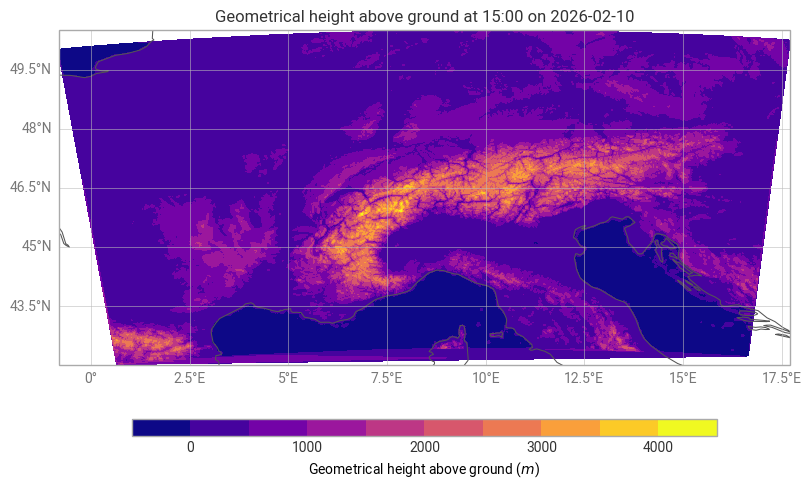

In [4]:
import earthkit as ek

ek.plots.quickplot(f)

### Xarray engine

In [5]:
ds_x = ds.to_xarray()
ds_x

<xarray.Dataset> Size: 64MB
Dimensions:    (values: 1147980)
Coordinates:
    latitude   (values) float64 9MB ...
    longitude  (values) float64 9MB ...
Dimensions without coordinates: values
Data variables:
    h          (values) float64 9MB ...
    lsm        (values) float64 9MB ...
    tlat       (values) float64 9MB ...
    tlon       (values) float64 9MB ...
    unknown    (values) float64 9MB ...
Attributes:
    date:         20260210
    time:         1500
    number:       0
    levelist:     0
    Conventions:  CF-1.8
    institution:  ECMWF

Plotting the h variable of the Xarray

/users/nburgdor/.cache/pypoetry/virtualenvs/nwp-demo-_81H7AQh-py3.11/lib/python3.11/site-packages/earthkit/plots/styles/__init__.py:525: UserWarning: The following kwargs were not used by contour: 'transform_first'
  return ax.tricontourf(x, y, values, *args, **kwargs)
/users/nburgdor/.cache/pypoetry/virtualenvs/nwp-demo-_81H7AQh-py3.11/lib/python3.11/site-packages/earthkit/plots/quickplot.py:152: UserWarning: Failed to execute title on given data with: 
unsupported format string passed to NoneType.__format__

consider constructing the plot manually.
  warnings.warn(


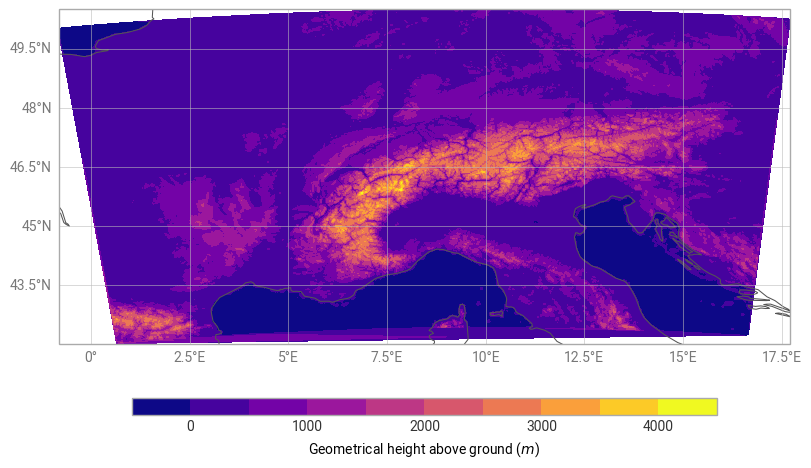

In [6]:
ek.plots.quickplot(ds_x.h)

### Regridding from unstrctured ICON to lat/lon 1°,1°

In [7]:
f_ll = ek.regrid.regrid(f, grid=[1,1])


In [8]:
# Note that teh gridType is regular_ll
f_ll.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,lssw,h,unknown,0,20260210,1500,0m,cp,0,regular_ll


In [9]:
f_ll.dump(namespace="geography")

Ni,18
Nj,9
iScansNegatively,0
jScansPositively,0
jPointsAreConsecutive,0
latitudeOfFirstGridPointInDegrees,50.0
longitudeOfFirstGridPointInDegrees,0.0
latitudeOfLastGridPointInDegrees,42.0
longitudeOfLastGridPointInDegrees,17.0
iDirectionIncrementInDegrees,1.0
jDirectionIncrementInDegrees,1.0


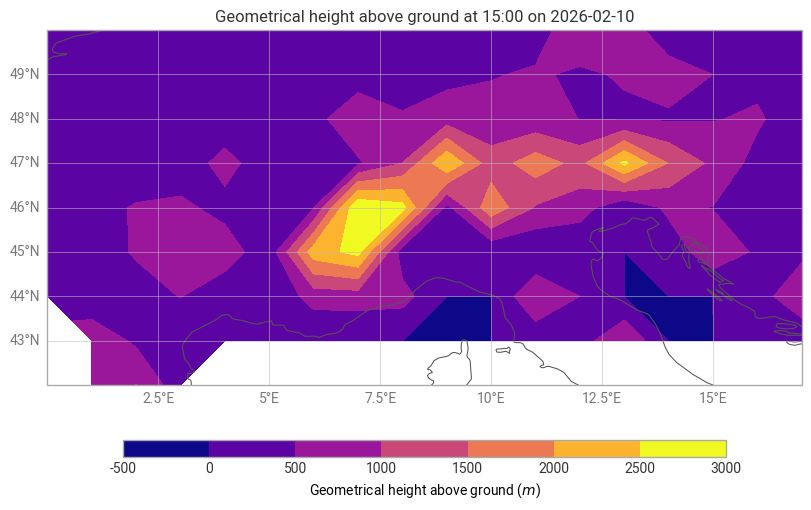

In [10]:
ek.plots.quickplot(f_ll)